## Required Packages

In [2]:
import ee
import geemap
import rasterio
import numpy as np
import matplotlib.pyplot as plt


## Authenticaion and Initialization

In [3]:
# Authenticaion and Initialization
ee.Authenticate()
ee.Initialize(project="ee-leolincoln9804")

In [4]:
# Define the Geological Range and Time Window
coords = ee.Geometry.Rectangle([-74.01, 40.75, -73.86, 40.88])
time_window = ee.DateRange("2021-06-01", "2021-09-01")

# Collection
collection = "MODIS/061/MCD19A2_GRANULES"

## Data Retrieval

In [5]:
dataset = ee.ImageCollection(collection) \
    .filterDate(time_window) \
    .filterBounds(coords) \
    .mean() \

bands_names = [
    "Optical_Depth_047",
    "Optical_Depth_055",
    "AOD_Uncertainty",
    "FineModeFraction",
    "Column_WV",
    "Injection_Height",
    "AOD_QA",
    "AngstromExp_470-780"
    # "cosSZA",
    # "cosVZA",
    # "RelAZ",
    # "Scattering_Angle",
    # "Glint_Angle"
]

aod = dataset.select(bands_names)

aod.bandNames().getInfo()

['Optical_Depth_047',
 'Optical_Depth_055',
 'AOD_Uncertainty',
 'FineModeFraction',
 'Column_WV',
 'Injection_Height',
 'AOD_QA',
 'AngstromExp_470-780']

In [6]:
SAVE_DIR = "../data/AOD/air_quality/"

output_file = "AOD_NewYork_Summer2021.tif"
geemap.ee_export_image(
    aod, 
    filename=SAVE_DIR+output_file, 
    scale=1000, 
    region=coords, 
    file_per_band=False
)

Generating URL ...
Please wait ...
An error occurred while downloading.


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

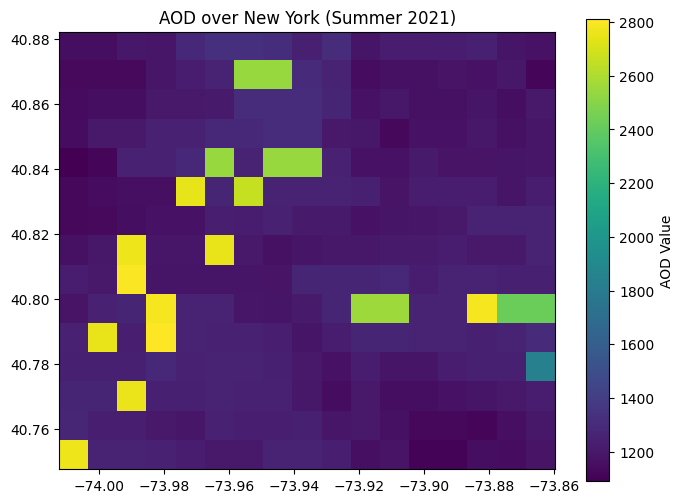

array([[1151.80377358, 1151.80377358, 1203.21132075, 1195.00754717,
        1286.70188679, 1324.23396226, 1324.23396226, 1311.42264151,
        1237.11320755, 1306.98113208, 1184.37358491, 1221.52830189,
        1221.52830189, 1229.73962264, 1239.00754717, 1185.24528302,
        1170.99622642],
       [1135.49056604, 1135.49056604, 1131.60754717, 1193.81886792,
        1222.19622642, 1263.14339623, 2542.45283019, 2542.45283019,
        1300.49056604, 1254.67924528, 1148.86415094, 1165.61132075,
        1165.61132075, 1179.1509434 , 1174.40754717, 1201.07169811,
        1121.25660377],
       [1136.81886792, 1149.87169811, 1149.87169811, 1203.51320755,
        1204.56603774, 1213.30566038, 1304.23396226, 1304.23396226,
        1305.18867925, 1266.86792453, 1171.3509434 , 1199.46037736,
        1163.47169811, 1163.47169811, 1189.6       , 1155.92075472,
        1204.30943396],
       [1145.03396226, 1206.03773585, 1206.03773585, 1245.4490566 ,
        1250.28301887, 1278.21509434, 1283.6

In [7]:
# tif. file path
tif_file = "..\\data\\air_quality\\AOD\\AOD_NewYork_Summer2021.tif"

# Open tif. file
with rasterio.open(tif_file) as src:
    aod_data = src.read(7)  # Đọc band đầu tiên
    profile = src.profile  # Metadata của file
    bounds = src.bounds


# print("Metadata")
# for key, value in profile.items():
#     print(f"{key}: {value}")



plt.figure(figsize=(8, 6))
plt.imshow(aod_data, cmap="viridis", interpolation="nearest", 
           extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
plt.colorbar(label="AOD Value")
plt.title("AOD over New York (Summer 2021)")
plt.show()

aod_data

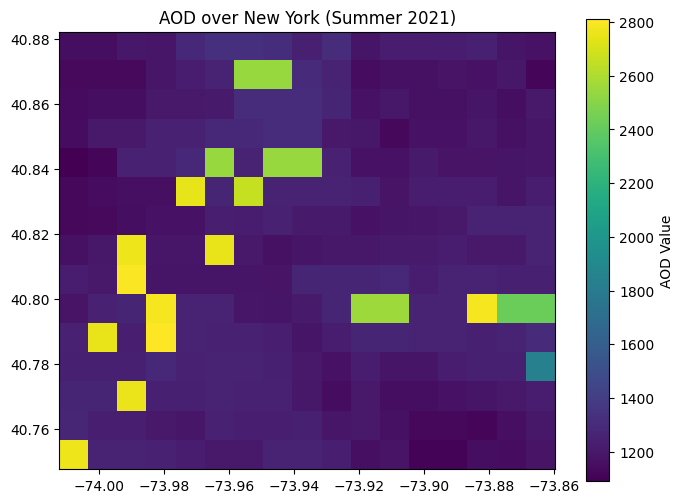

array([[1151.80377358, 1151.80377358, 1203.21132075, 1195.00754717,
        1286.70188679, 1324.23396226, 1324.23396226, 1311.42264151,
        1237.11320755, 1306.98113208, 1184.37358491, 1221.52830189,
        1221.52830189, 1229.73962264, 1239.00754717, 1185.24528302,
        1170.99622642],
       [1135.49056604, 1135.49056604, 1131.60754717, 1193.81886792,
        1222.19622642, 1263.14339623, 2542.45283019, 2542.45283019,
        1300.49056604, 1254.67924528, 1148.86415094, 1165.61132075,
        1165.61132075, 1179.1509434 , 1174.40754717, 1201.07169811,
        1121.25660377],
       [1136.81886792, 1149.87169811, 1149.87169811, 1203.51320755,
        1204.56603774, 1213.30566038, 1304.23396226, 1304.23396226,
        1305.18867925, 1266.86792453, 1171.3509434 , 1199.46037736,
        1163.47169811, 1163.47169811, 1189.6       , 1155.92075472,
        1204.30943396],
       [1145.03396226, 1206.03773585, 1206.03773585, 1245.4490566 ,
        1250.28301887, 1278.21509434, 1283.6

In [8]:
# tif. file path
tif_file = "..\\data\\air_quality\\AOD\\AOD_NewYork_Summer2021_manually.tif"

# Open tif. file
with rasterio.open(tif_file) as src:
    aod_data = src.read(7)  # Đọc band đầu tiên
    profile = src.profile  # Metadata của file
    bounds = src.bounds


# print("Metadata")
# for key, value in profile.items():
#     print(f"{key}: {value}")



plt.figure(figsize=(8, 6))
plt.imshow(aod_data, cmap="viridis", interpolation="nearest", 
           extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
plt.colorbar(label="AOD Value")
plt.title("AOD over New York (Summer 2021)")
plt.show()

aod_data